# Import

In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import Image, display
import pickle
import os

In [14]:
data_dir = r'/data'

# Setup

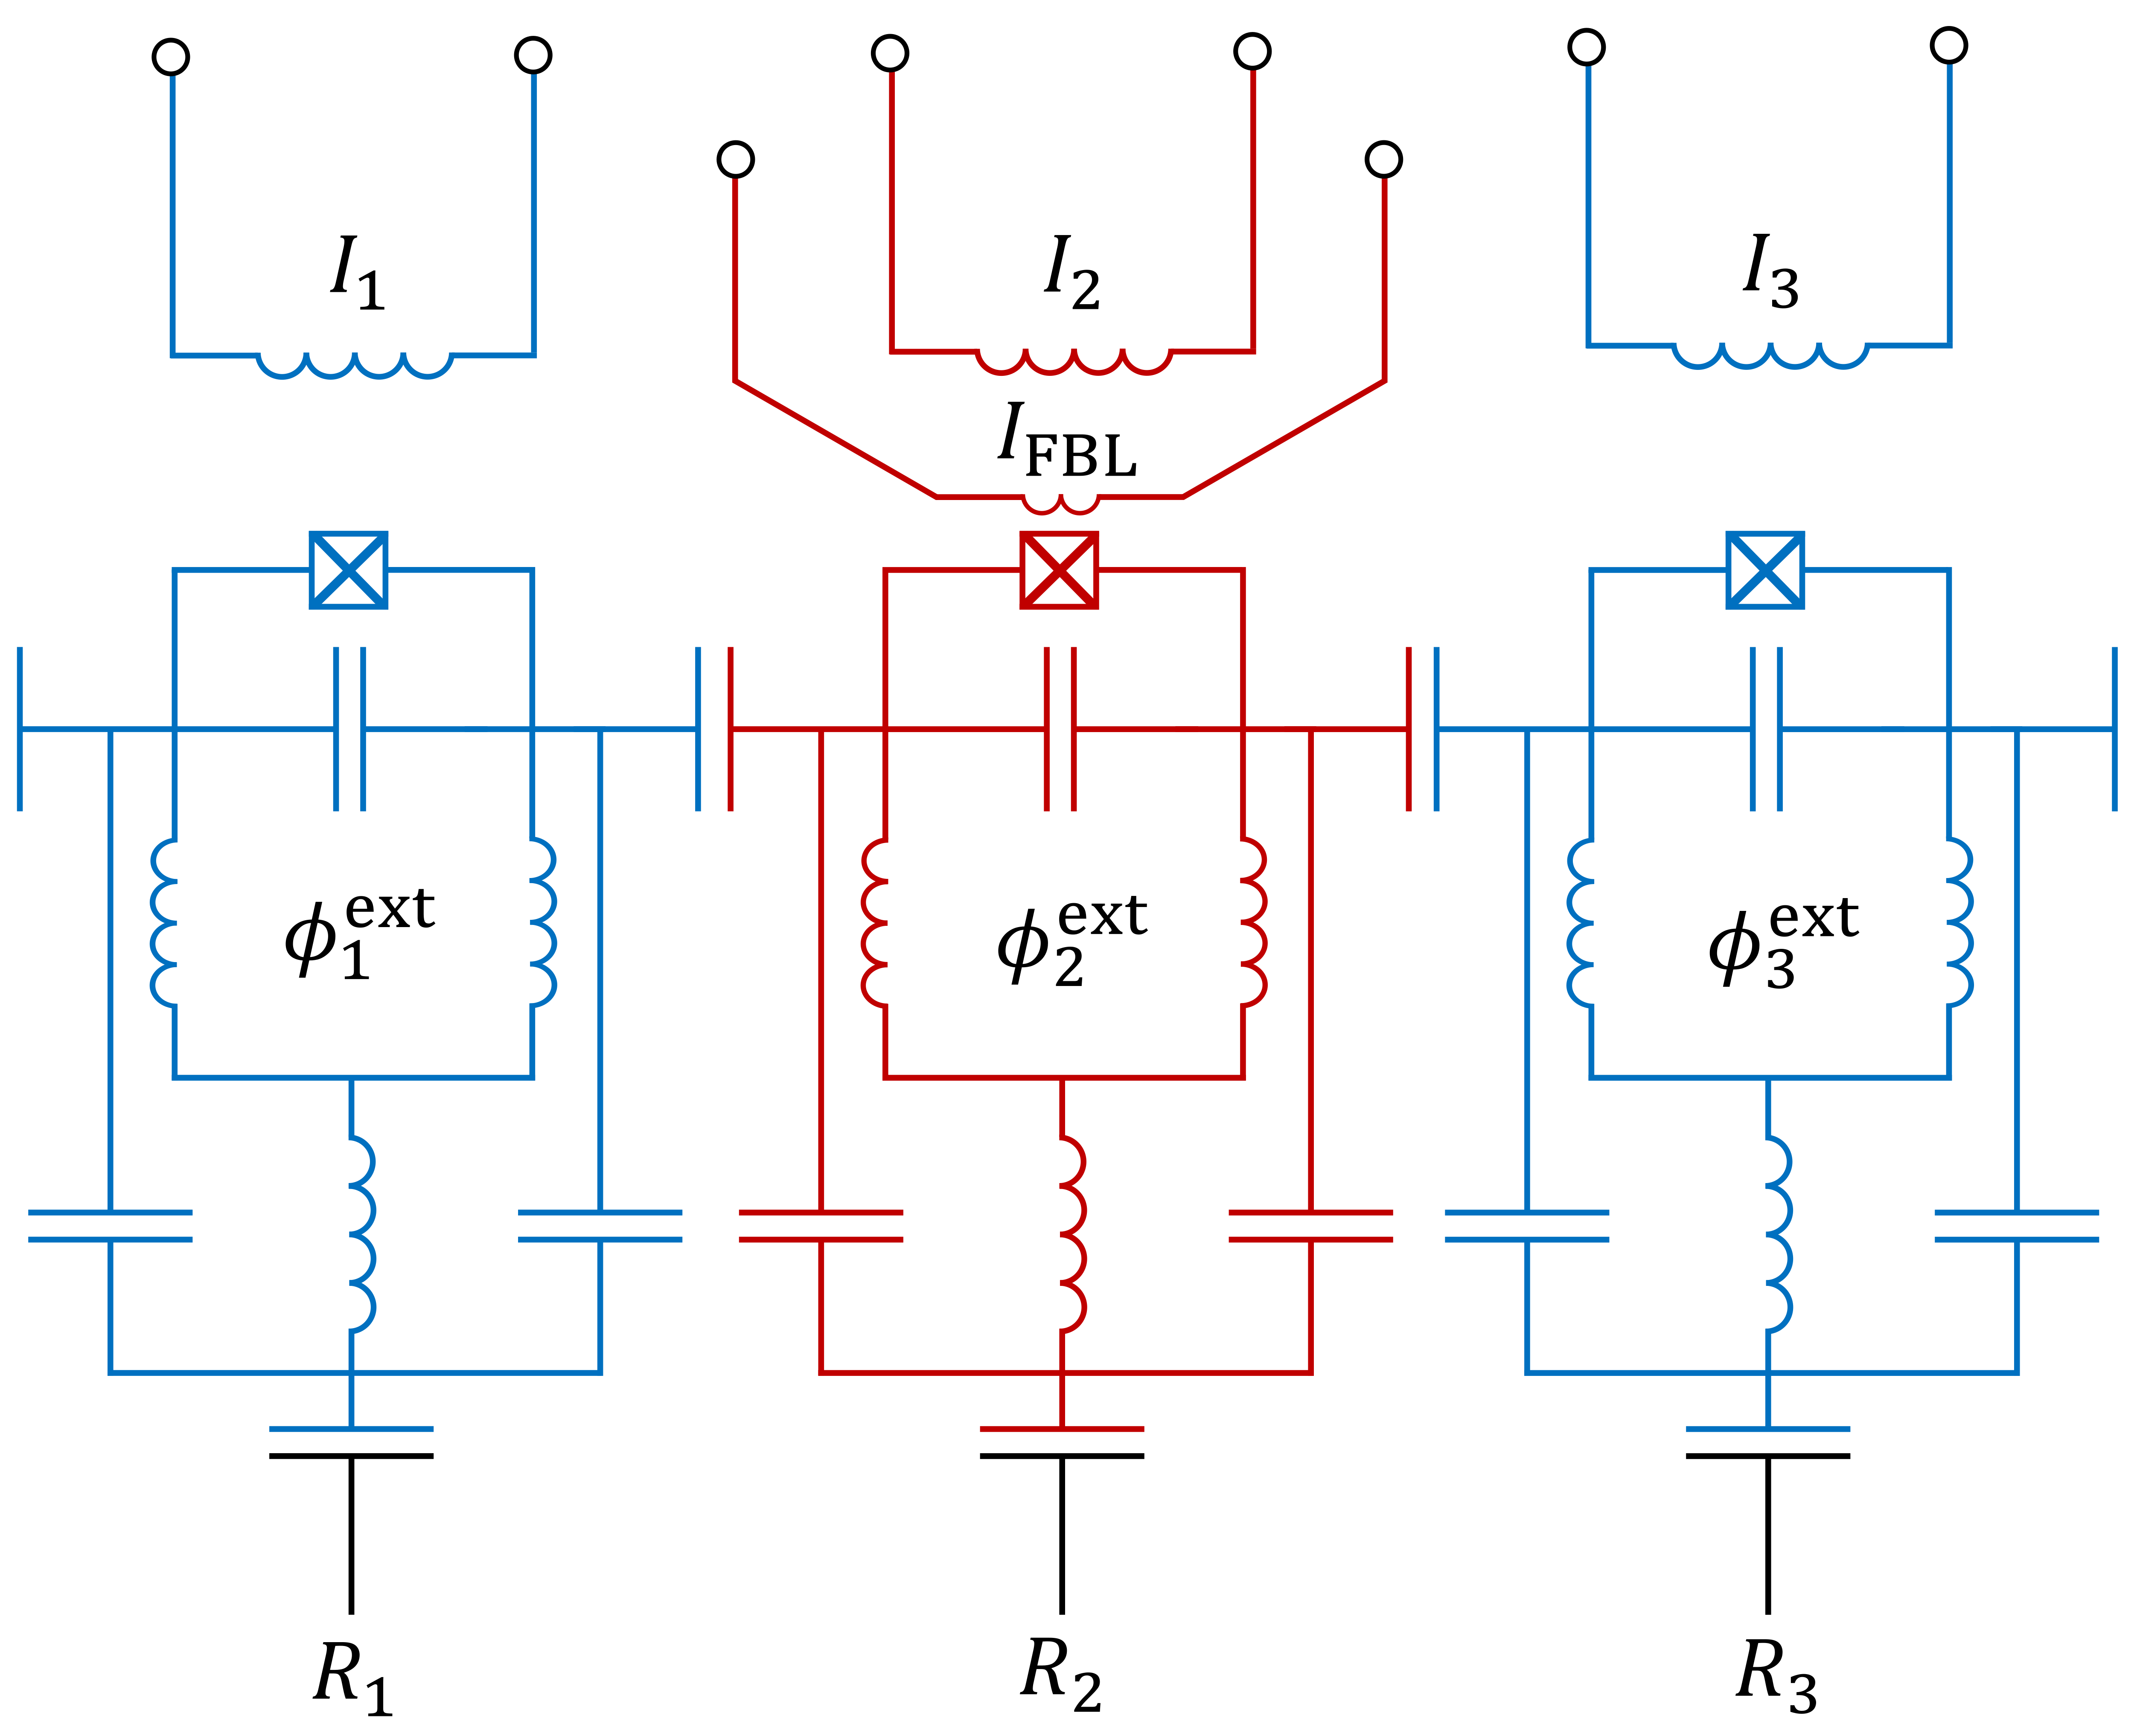

In [15]:
display(Image(filename='./img/coupled_qubits_sketch.png'))  # Width in pixels

In the following experiments, we probe the resonators' and qubits' spectra by measuring in reflection at the readout and drive ports $R_1$ to $R_3$ and applying one or more currents 

\begin{equation*}
\vec{I} = (I_1, I_2, I_3)^{\intercal}
\end{equation*}

through the global bias coils. From the emerging avoided level crossings we extract the periodicities and flux offsets

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

at each unit cell. Because of the cross-talk of the "big" bias coils, all coils influence each unit cell, such that we have to set up the inductance matrix

\begin{equation*}
\mathbf{L} = 
\begin{pmatrix}
 L_{11} & L_{12} & L_{13}  \\ 
 L_{21} & L_{22} & L_{23}  \\
 L_{31} & L_{32} & L_{33}
\end{pmatrix}.
\end{equation*}

The fluxes are then given by


\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = \mathbf{L}\vec{I} + \vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

with

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = (\Phi^{\mathrm{ext}}_1, \Phi^{\mathrm{ext}}_2, \Phi^{\mathrm{ext}}_3)^{\intercal}
\end{equation*}

In the following, we want to observe the avoided crossings between all modes. For that, we sweep the flux with all coils for each resonator. Looking at resonator 1 and sweeping the flux with coil 1 gives us the flux-periodicity of qubit 1. But because qubit 2 is further away from coil 1, qubit 2 might not have moved through resonator 1 and we don't see the crossing. Because of that, we do the same experiment with coil 2 until we see one period of qubit 1. Then we can be sure that we have moved qubit 2 through resonator 1 several times because $L_{22}$ is much bigger than $L_{21}$.

The same logic applies to all measurements.

It might actually be that with this procedure, we don't resolve small crossings because we move qubit 2 through resonator 1 too fast. The resolution of these measurements is therefore not optimal

# Resonator 1

## Coil 1: Sweep $I_1$

In [17]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_rough_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_rough_q1_coil1.pkl', 'rb') as f:
    current__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_rough_q1_coil1.pkl', 'rb') as f:
    phase__fs_rough_q1_coil1 = pickle.load(f)

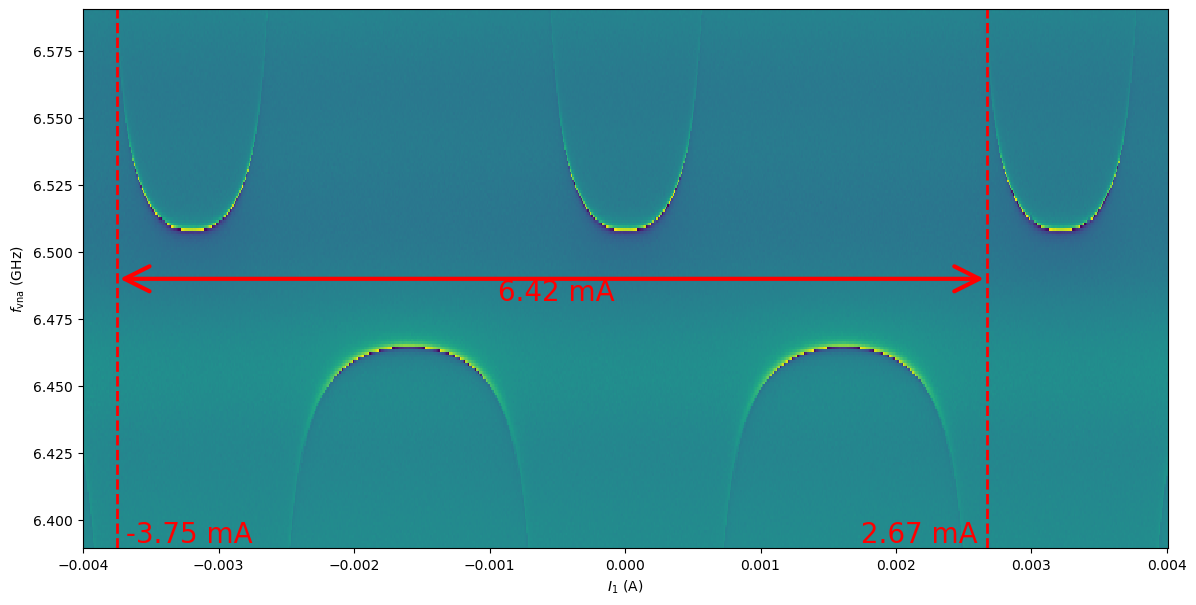

I0__q1 = 3.21 mA


In [18]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q1_coil1, f_vna__fs_rough_q1_coil1*1e-9, phase__fs_rough_q1_coil1.T, shading = 'auto')

I_ss_low__fs = -0.00375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.00267
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q1 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q1*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q1/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

ax.set_xlabel(r'$I_1$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q1 = {} mA'.format(I0_q1*1e3))

In [19]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fs_q1_coil1.pkl', 'rb') as f:
    current__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/phase__fs_q1_coil1.pkl', 'rb') as f:
    phase__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fres_q1_coil1.pkl', 'rb') as f:
    current_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/fres__fres_q1_coil1.pkl', 'rb') as f:
    fres_q1_coil1 = pickle.load(f)
    
current_q1_coil1 = np.concatenate([current_q1_coil1[0], current_q1_coil1[1], current_q1_coil1[2]])
fres_q1_coil1 = np.concatenate([fres_q1_coil1[0], fres_q1_coil1[1], fres_q1_coil1[2]])

I_ss__q1_fs= 0.0112 mA
fr_ss__q1= 6.5086 GHz


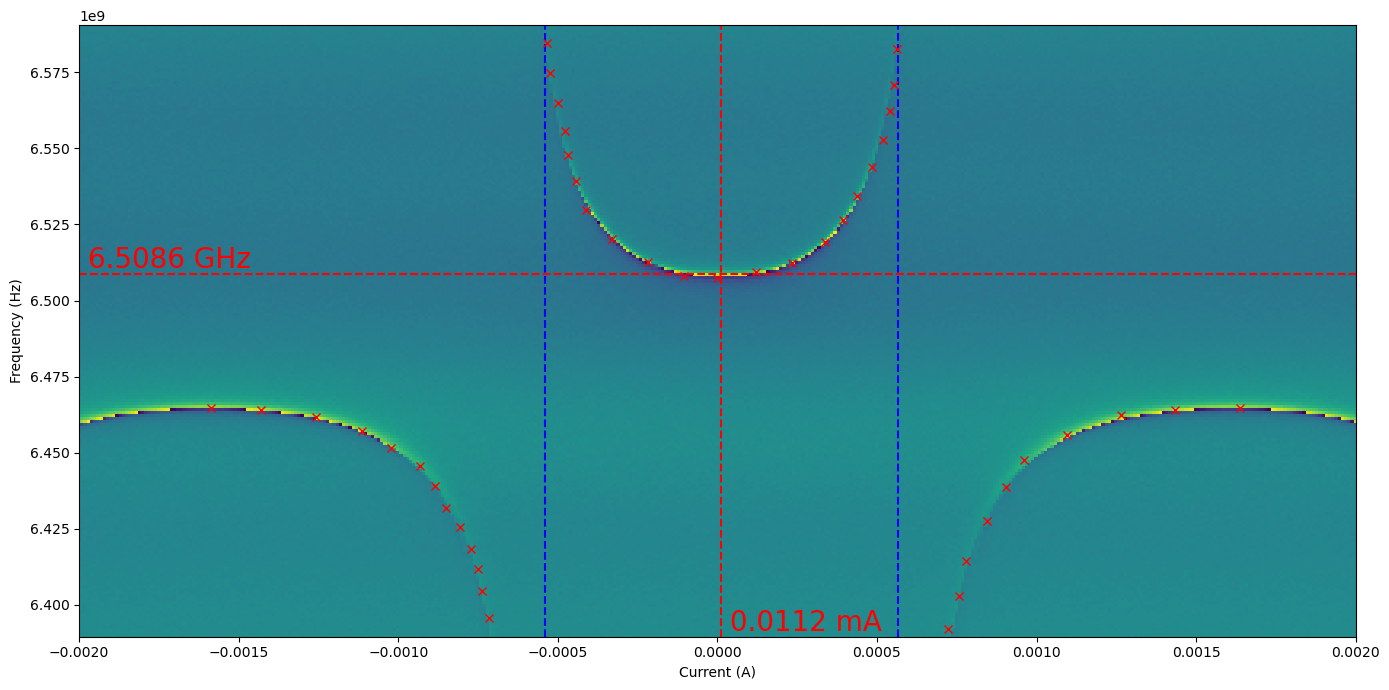

In [20]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil1, f_vna__fs_q1_coil1, phase__fs_q1_coil1.T,shading='auto')

I_ss__q1_fs = 1.12*1e-5
ax.axvline(x=I_ss__q1_fs,ls='--',color='red')
ax.text(s=' {} mA'.format(round(I_ss__q1_fs*1e3,5)),x=I_ss__q1_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
print('I_ss__q1_fs= {} mA'.format(round(I_ss__q1_fs*1e3,5)))

ax.axvline(x=-0.000541, ls='--', color='blue')
ax.axvline(x=0.000565, ls='--', color='blue')    

ax.set_xlim([-0.002,0.002])
if True:
    fr_ss__q1=6.5086*1e9
    ax.axhline(y=fr_ss__q1, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q1*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q1, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q1= {} GHz'.format(round(fr_ss__q1*1e-9,5)))

ax.plot(current_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

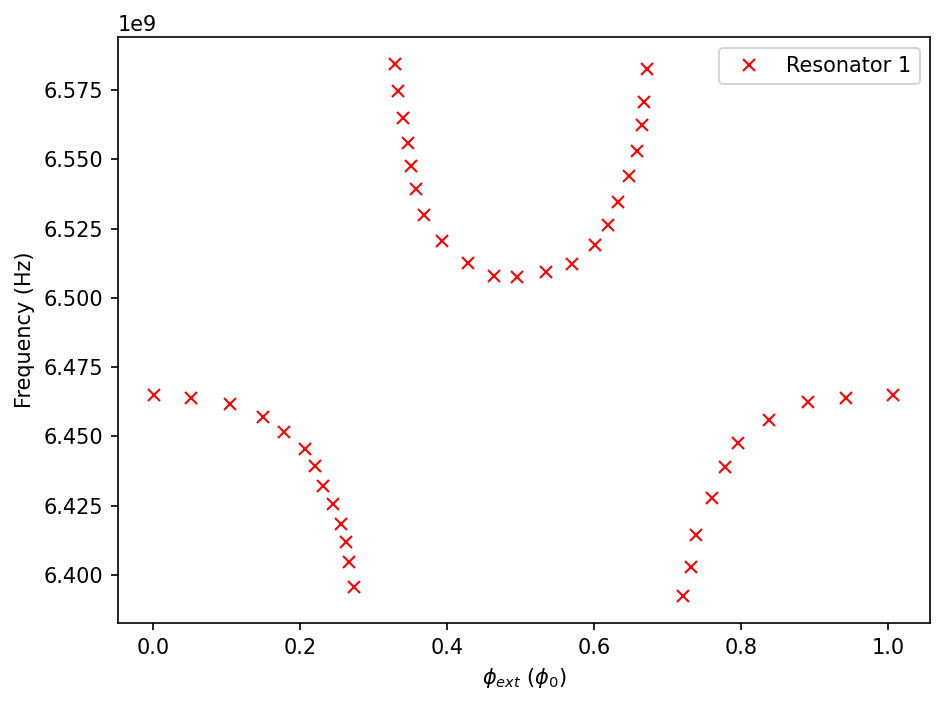

In [25]:
phi_q1_coil1 = (current_q1_coil1 - I_ss__q1_fs + I0_q1/2  ) /I0_q1

fig, ax = plt.subplots(dpi=150)
ax.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')

ax.set_ylabel('Frequency (Hz)')
ax.set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax.legend()
fig.tight_layout()

## Coil 2: Sweep $I_2$

In [27]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q1_coil2.pkl', 'rb') as f:
    f_vna__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_q1_coil2.pkl', 'rb') as f:
    current__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_q1_coil2.pkl', 'rb') as f:
    phase__fs_q1_coil2 = pickle.load(f)

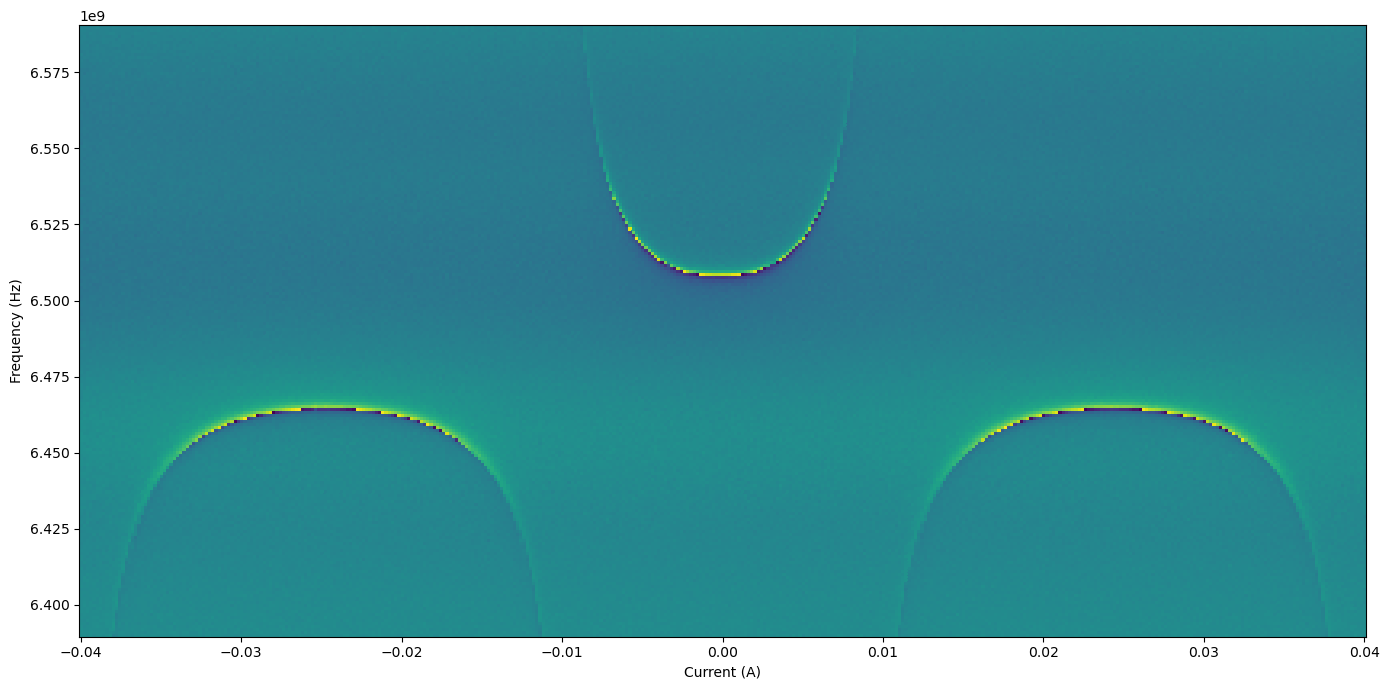

In [28]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil2, f_vna__fs_q1_coil2, phase__fs_q1_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 3: Sweep $I_3$

In [29]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q1_coil3.pkl', 'rb') as f:
    f_vna__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_q1_coil3.pkl', 'rb') as f:
    current__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_q1_coil3.pkl', 'rb') as f:
    phase__fs_q1_coil3 = pickle.load(f)

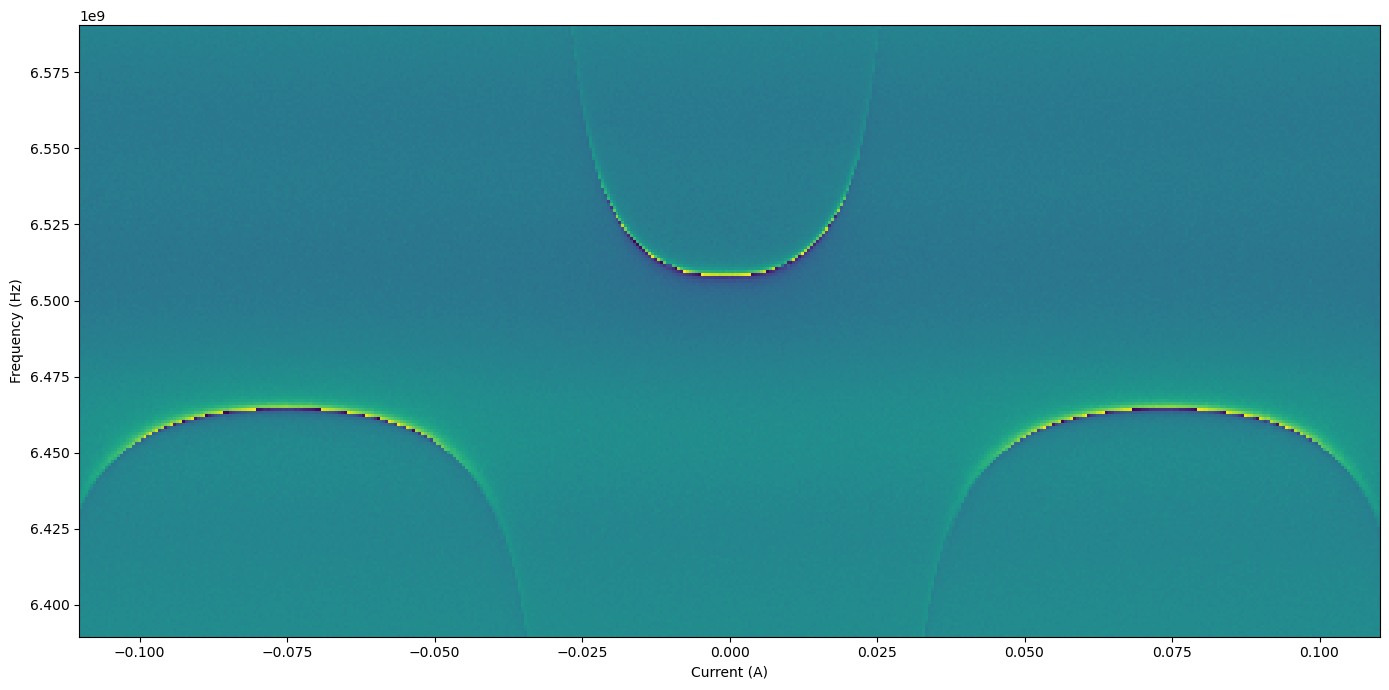

In [30]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil3, f_vna__fs_q1_coil3, phase__fs_q1_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

# Resonator 3

## Coil 3: Sweep $I_3$

In [31]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_rough_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_rough_q3_coil3.pkl', 'rb') as f:
    current__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_rough_q3_coil3.pkl', 'rb') as f:
    phase__fs_rough_q3_coil3 = pickle.load(f)

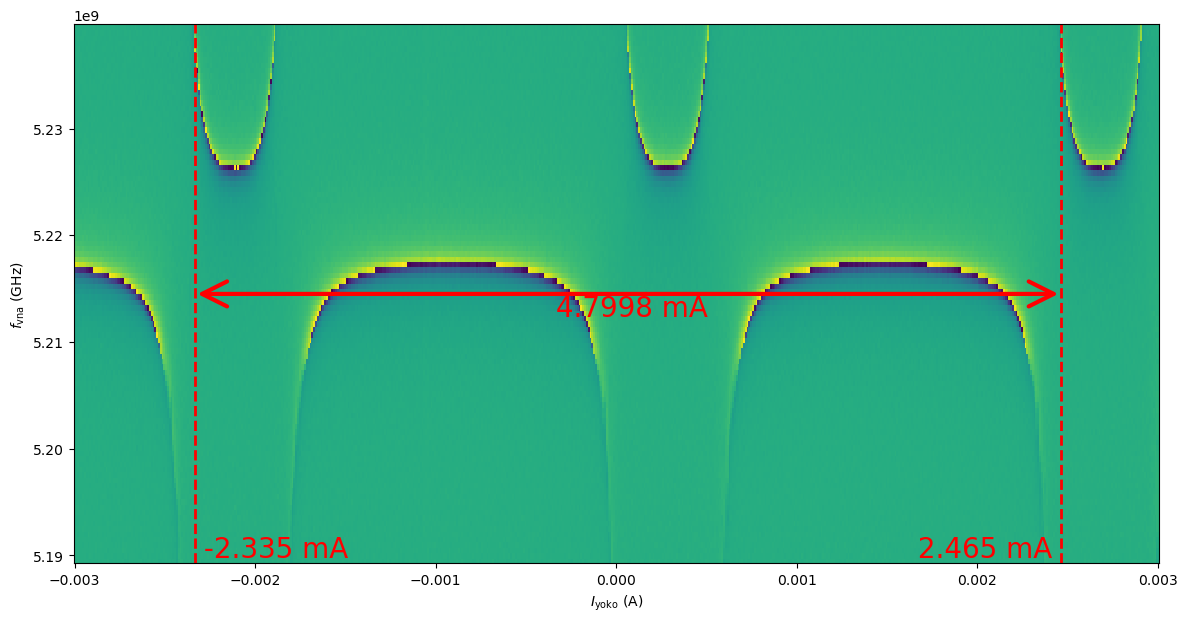

I0__q3 = 2.3999 mA


In [32]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q3_coil3, f_vna__fs_rough_q3_coil3, phase__fs_rough_q3_coil3.T, shading = 'auto')

I_ss_low__fs = -0.002335
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0024648
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q3 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q3*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q3/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q3 = {} mA'.format(I0_q3*1e3))

In [35]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fs_q3_coil3.pkl', 'rb') as f:
    current__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/phase__fs_q3_coil3.pkl', 'rb') as f:
    phase__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fres_q3_coil3.pkl', 'rb') as f:
    current_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/fres__fres_q3_coil3.pkl', 'rb') as f:
    fres_q3_coil3 = pickle.load(f)
    
current_q3_coil3 = np.concatenate([current_q3_coil3[0], current_q3_coil3[1], current_q3_coil3[2]])
fres_q3_coil3 = np.concatenate([fres_q3_coil3[0], fres_q3_coil3[1], fres_q3_coil3[2]])

I_ss__q3_fs= 0.29 mA
fr_ss__q3= 5.22635 GHz


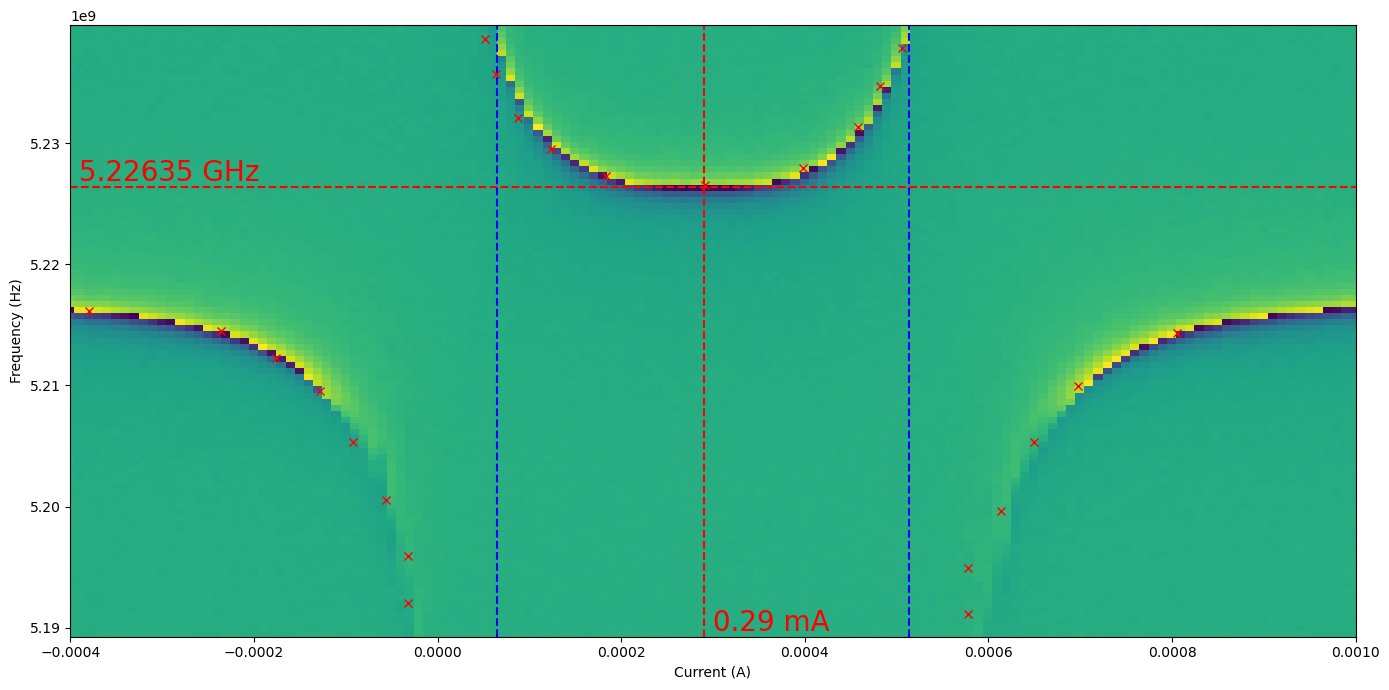

In [38]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil3, f_vna__fs_q3_coil3, phase__fs_q3_coil3.T,shading='auto')


if True:
    I_ss__q3_fs = 0.00029
    ax.axvline(x=I_ss__q3_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__q3_fs*1e3,5)),x=I_ss__q3_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__q3_fs= {} mA'.format(round(I_ss__q3_fs*1e3,5)))
    
    ax.axvline(x=6.505*1e-5, ls='--', color='blue')
    ax.axvline(x=0.000514, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([-0.0004,0.001])

if True:
    fr_ss__q3=5.22635*1e9
    ax.axhline(y=fr_ss__q3, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q3*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q3, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q3= {} GHz'.format(round(fr_ss__q3*1e-9,5)))

ax.plot(current_q3_coil3, fres_q3_coil3, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')

# ax.set_ylim([2.5e9, 10e9])
fig.tight_layout()
plt.show()

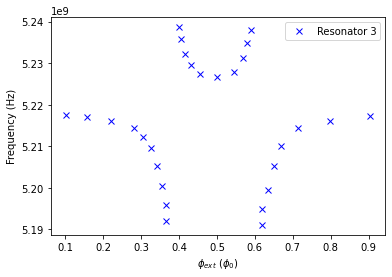

In [99]:
phi_q3_coil3 = (current_q3_coil3 - I_ss__q3_fs + I0_q3/2  ) /I0_q3
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='blue',ls='', label = 'Resonator 3')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [100]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q3_coil1.pkl', 'rb') as f:
    f_vna__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_q3_coil1.pkl', 'rb') as f:
    current__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_q3_coil1.pkl', 'rb') as f:
    phase__fs_q3_coil1 = pickle.load(f)

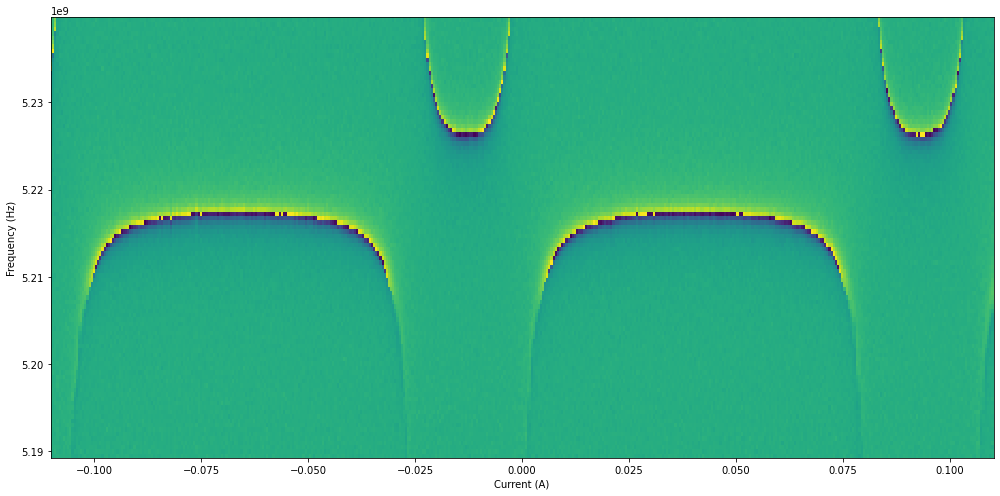

In [101]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil1, f_vna__fs_q3_coil1, phase__fs_q3_coil1.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 2: Sweep $I_2$

In [102]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q3_coil2.pkl', 'rb') as f:
    f_vna__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_q3_coil2.pkl', 'rb') as f:
    current__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_q3_coil2.pkl', 'rb') as f:
    phase__fs_q3_coil2 = pickle.load(f)

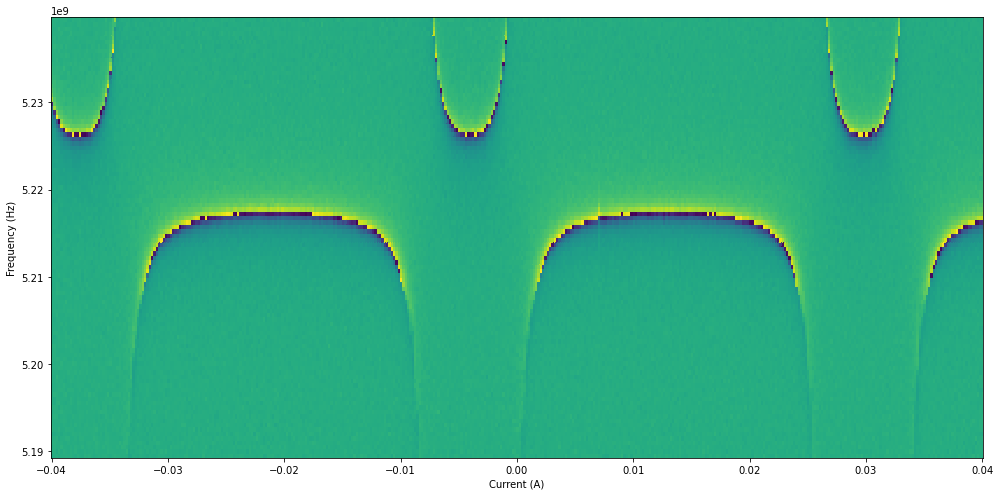

In [103]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil2, f_vna__fs_q3_coil2, phase__fs_q3_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

tiny feature at ~7mA

# Resonator 2

## Coil 2: Sweep $I_2$

In [104]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_rough_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_rough_q2_coil2.pkl', 'rb') as f:
    current__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_rough_q2_coil2.pkl', 'rb') as f:
    phase__fs_rough_q2_coil2 = pickle.load(f)

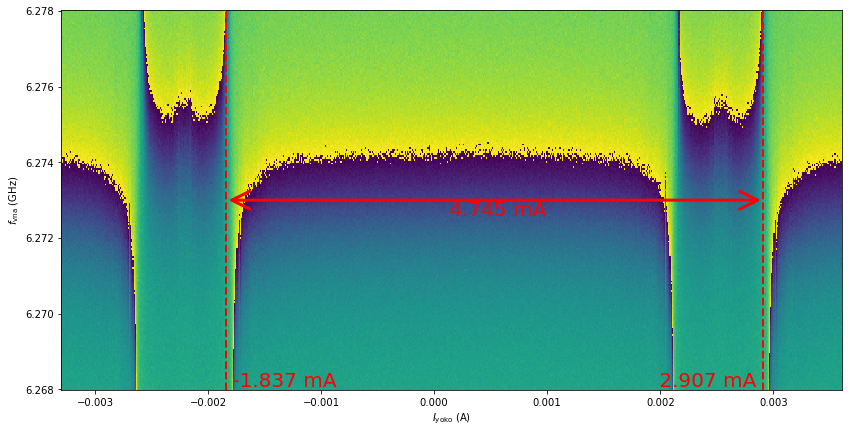

I0__q2 = 4.745 mA


In [105]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q2_coil2, f_vna__fs_rough_q2_coil2*1e-9, phase__fs_rough_q2_coil2.T, shading = 'auto')

I_ss_low__fs = -0.0018375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0029075
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 1
I0_c2 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_c2*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_c2/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q2 = {} mA'.format(I0_c2*1e3))

In [106]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fs_q2_coil2.pkl', 'rb') as f:
    current__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/phase__fs_q2_coil2.pkl', 'rb') as f:
    phase__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fres_q2_coil2.pkl', 'rb') as f:
    current_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/fres__fres_q2_coil2.pkl', 'rb') as f:
    fres_q2_coil2 = pickle.load(f)
    
current_q2_coil2 = np.concatenate([current_q2_coil2[0], current_q2_coil2[1], current_q2_coil2[2]])
fres_q2_coil2 = np.concatenate([fres_q2_coil2[0], fres_q2_coil2[1], fres_q2_coil2[2]])

I_ss__c2_fs= 2.54 mA
fr_ss__c2= 6.27544 GHz


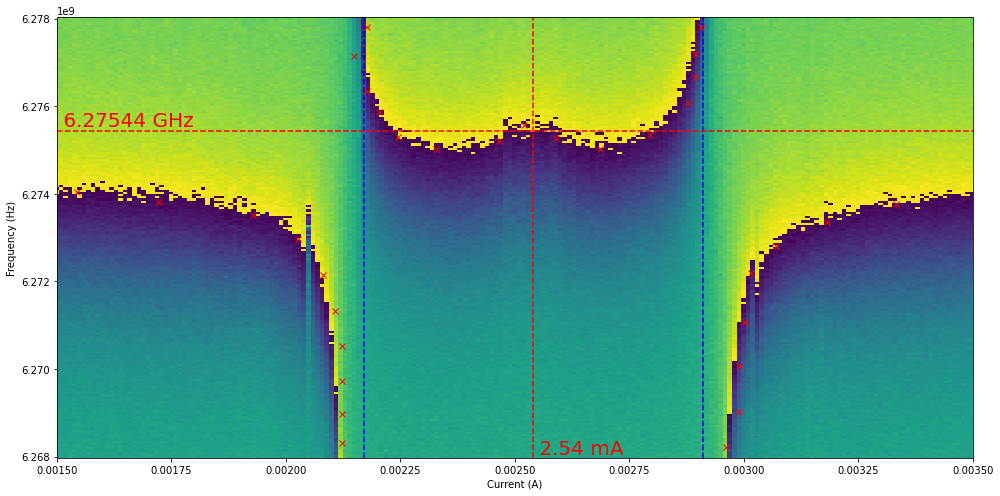

In [107]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil2, f_vna__fs_q2_coil2, phase__fs_q2_coil2.T,shading='auto')


if True:
    I_ss__c2_fs = 0.00254
    ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    ax.axvline(x=0.00217, ls='--', color='blue')
    ax.axvline(x=0.00291, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([0.0015,0.0035])
if True:
    fr_ss__c2=6.27544*1e9
    ax.axhline(y=fr_ss__c2, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil2, fres_q2_coil2, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

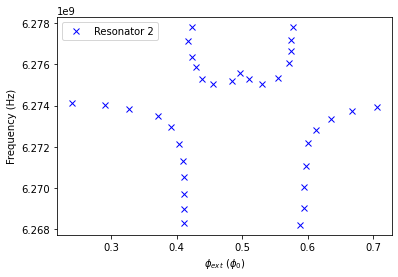

In [108]:
phi_q2_coil2 = (current_q2_coil2 - I_ss__c2_fs + I0_c2/2  ) /I0_c2
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [109]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q2_coil1.pkl', 'rb') as f:
    f_vna__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fs_q2_coil1.pkl', 'rb') as f:
    current__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/phase__fs_q2_coil1.pkl', 'rb') as f:
    phase__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/current__fres_q2_coil1.pkl', 'rb') as f:
    current_q2_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/fres__fres_q2_coil1.pkl', 'rb') as f:
    fres_q2_coil1 = pickle.load(f)

1.1999999999999966e-05
fr_ss__c2= 6.27544 GHz


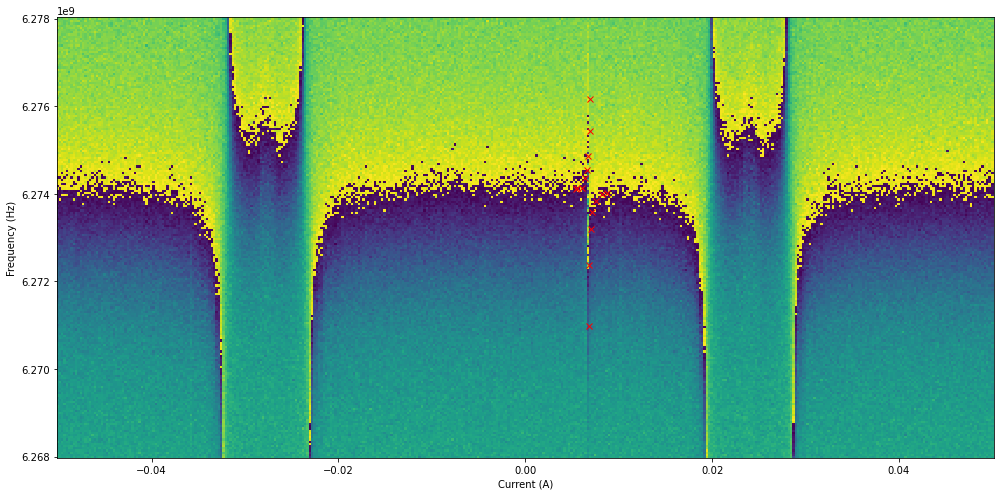

In [110]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil1, f_vna__fs_q2_coil1, phase__fs_q2_coil1.T,shading='auto')


if True:
    #I_ss__c2_fs = 0.00254
    #ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    #ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    #print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    #ax.axvline(x=0.00217, ls='--', color='blue')
    #ax.axvline(x=0.00291, ls='--', color='blue')    
    print((-0.000541+0.000565)/2)

#ax.set_xlim([0.0015,0.0035])
if True:
    #fr_ss__c2=6.27544*1e9
    #ax.axhline(y=fr_ss__c2, ls='--', color='red')
    #ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

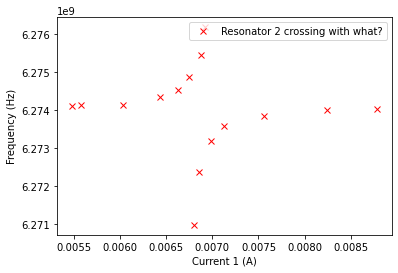

In [111]:
plt.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='', label = 'Resonator 2 crossing with what?')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Current 1 (A)')
plt.legend()

If this was qubit 1, we would see it crossing several times with periodicity 3.21 mA

If this was qubit 3, we would see a periodicity of 100 mA which is the width of the window. But there is only one crossing.

Both is not the case ...

## Coil 3: Sweep $I_3$

In [112]:
with open(os.getcwd() + data_dir + r'/f_vna__fs_q2_coil3.pkl', 'rb') as f:
    f_vna__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/current__fs_q2_coil3.pkl', 'rb') as f:
    current__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/phase__fs_q2_coil3.pkl', 'rb') as f:
    phase__fs_q2_coil3 = pickle.load(f)

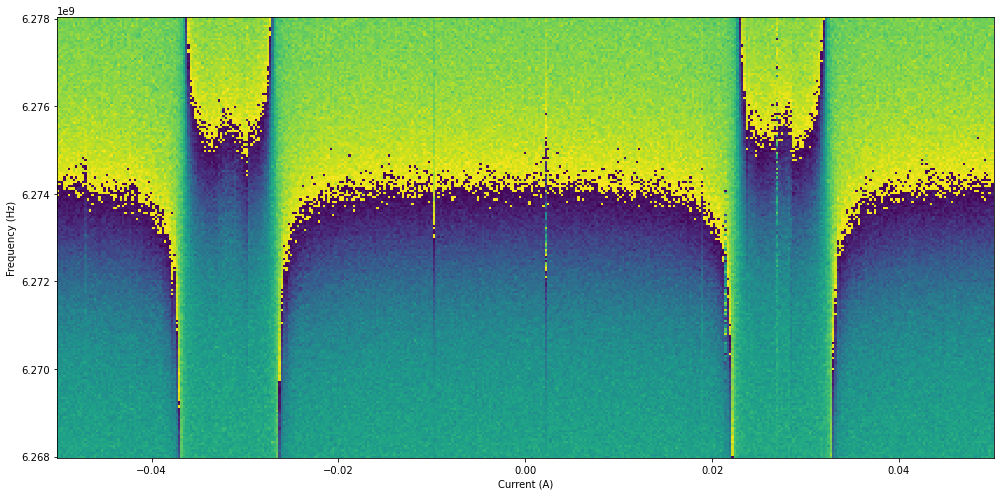

In [113]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil3, f_vna__fs_q2_coil3, phase__fs_q2_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

It is 10 mA between the crossings

qubit 3 would have a periodicity of 2.4 mA
qubit 1 would have a periodicity of 150 mA

Not sure what the extra crossings are ...

# Summary resonator spectroscopy

Be aware that the x axis is in a sense artificial, because we don't align all three external fluxes. All curves are shifted with respect to each other depending on the experiment 

You can also see that the crossings are very small for resonator 2. This is because we didnt take care of engineering the readout of this qubit as it is supposed to be the coupler qubit. Also the measurements are very noisy as you may have moticed. This is because we used our "worst" output line for the readout of the coupler qubit to save the good lines for the actual qubits 1 and 3.

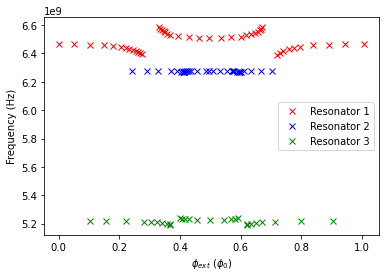

In [114]:
plt.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')


#plt.ylim([6.2e9, 6.33e9])
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

# Qubit 1

In [115]:
with open(os.getcwd() + data_dir + r'/x__q1_tt_low_q1.pkl', 'rb') as f:
    x__q1_tt_low = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'/y__q1_tt_low_q1.pkl', 'rb') as f:
    y__q1_tt_low = pickle.load(f)[0]
    
with open(os.getcwd() + data_dir + r'/x__q1_tt_up_q1.pkl', 'rb') as f:
    x__q1_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q1_tt_up_q1.pkl', 'rb') as f:
    y__q1_tt_up = pickle.load(f)

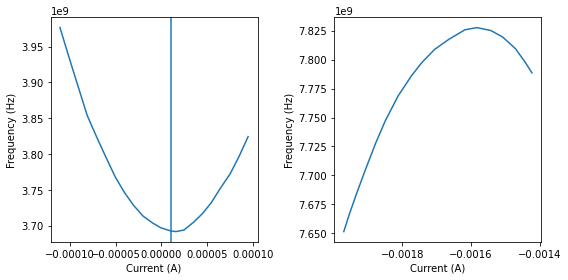

In [116]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q1_tt_low, y__q1_tt_low )
ax[0].axvline(1e-5)
I_ss__q1_tt_low = 1e-5

ax[1].plot(x__q1_tt_up, y__q1_tt_up )

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [117]:
x__q1_tt = np.concatenate([x__q1_tt_low, x__q1_tt_up])
y__q1_tt = np.concatenate([y__q1_tt_low, y__q1_tt_up])

In [118]:
phi_q1_tt = (x__q1_tt - I_ss__q1_tt_low + I0_q1/2  ) /I0_q1

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

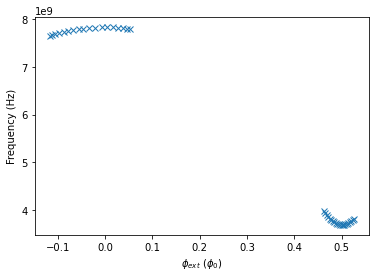

In [119]:
plt.plot(phi_q1_tt, y__q1_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

# Test fitting qubit 1

# Qubit 2

In [120]:
with open(os.getcwd() + data_dir + r'/x__q2_tt_low_q2.pkl', 'rb') as f:
    x__q2_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q2_tt_low_q2.pkl', 'rb') as f:
    y__q2_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'/x__q2_tt_up_q2.pkl', 'rb') as f:
    x__q2_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q2_tt_up_q2.pkl', 'rb') as f:
    y__q2_tt_up = pickle.load(f)

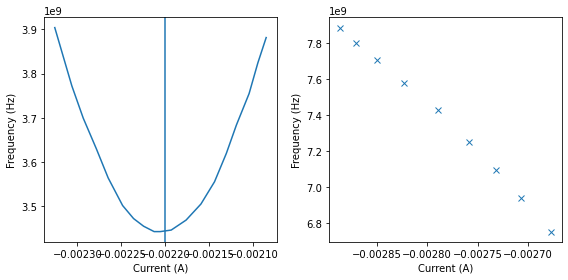

In [121]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q2_tt_low, y__q2_tt_low )
ax[0].axvline(-2.2e-3)
I_ss__q2_tt_low = -2.2e-3

ax[1].plot(x__q2_tt_up, y__q2_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [122]:
x__q2_tt = np.concatenate([x__q2_tt_low, x__q2_tt_up])
y__q2_tt = np.concatenate([y__q2_tt_low, y__q2_tt_up])

In [123]:
phi_q2_tt = (x__q2_tt - I_ss__q2_tt_low + I0_c2/2  ) /I0_c2

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

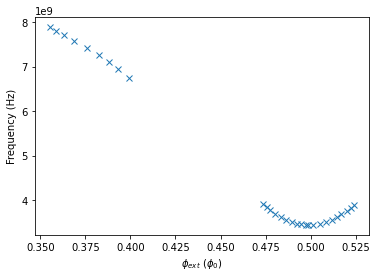

In [124]:
plt.plot(phi_q2_tt, y__q2_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

# Qubit 3

In [125]:
with open(os.getcwd() + data_dir + r'/x__q3_tt_low_q3.pkl', 'rb') as f:
    x__q3_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q3_tt_low_q3.pkl', 'rb') as f:
    y__q3_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'/x__q3_tt_up_q3.pkl', 'rb') as f:
    x__q3_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__q3_tt_up_q3.pkl', 'rb') as f:
    y__q3_tt_up = pickle.load(f)

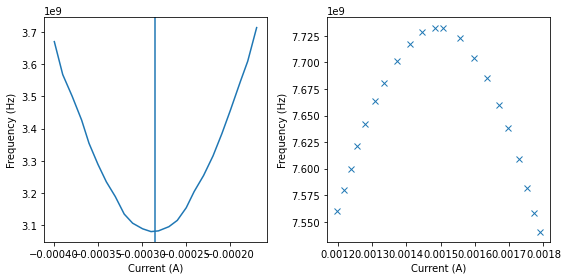

In [126]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(-x__q3_tt_low, y__q3_tt_low )
ax[0].axvline(-2.85e-4)
I_ss__q3_tt_low = -2.85e-4

ax[1].plot(x__q3_tt_up, y__q3_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [127]:
x__q3_tt = np.concatenate([x__q3_tt_low, x__q3_tt_up])
y__q3_tt = np.concatenate([y__q3_tt_low, y__q3_tt_up])

In [128]:
phi_q3_tt = (-x__q3_tt - I_ss__q3_tt_low + I0_q3/2  ) /I0_q3

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

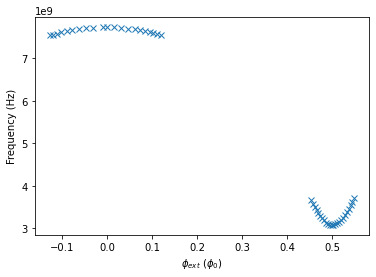

In [129]:
plt.plot(phi_q3_tt, y__q3_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

# Summary qubit and resonator spectroscopy

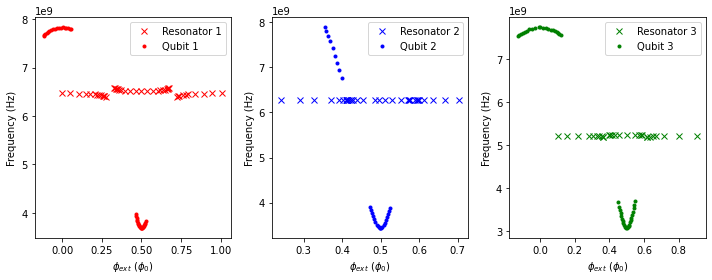

In [130]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

ax[0].plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
ax[0].plot(phi_q1_tt, y__q1_tt, marker='.',color='red',ls='', label = 'Qubit 1')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[0].legend()

ax[1].plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
ax[1].plot(phi_q2_tt, y__q2_tt, marker='.',color='blue',ls='', label = 'Qubit 2')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[1].legend()

ax[2].plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')
ax[2].plot(phi_q3_tt, y__q3_tt, marker='.',color='green',ls='', label = 'Qubit 3')
ax[2].set_ylabel('Frequency (Hz)')
ax[2].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[2].legend()

fig.tight_layout()

# q1-q2-q3 avoided crossing

Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In the background, we have a flux calibration which converts a set of desired qubit frequencies into a set of currents through the coils. As a result, the x axis corrsponds to a change of $\vec{I}$ along all components. So what is important is only the y axis that gives the measured energies. 

In [131]:
with open(os.getcwd() + data_dir + r'/x__tt_3LevAC.pkl', 'rb') as f:
    x__tt_3LevAC = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__tt_3LevAC.pkl', 'rb') as f:
    y__tt_3LevAC = pickle.load(f)

Text(0.5, 0, 'Sweep parameters (a.u.)')

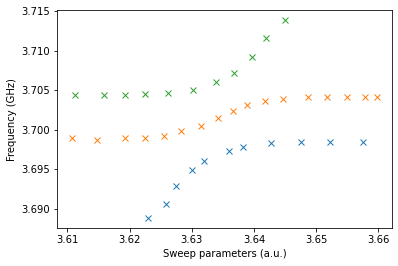

In [132]:
for i in range(len(x__tt_3LevAC)):
    plt.plot(x__tt_3LevAC[i], y__tt_3LevAC[i], 'x')
    
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameters (a.u.)')

# q1 - q3 avoided crossing while q2 is off-resonant

We keep q1 at its half-flux point ~ 3.7 GHz and move q2 to its half-flux point ~3.4 GHz such that they are 100's Mhz detuned. Then we sweep q3 through q1 and try to measure the frequency of qubit 1 as precisely as possible via Ramsey interferometry. Notice the different scale of the y axis which is now showing kHz differences. It is not possible to measure clear anticrossings but we observe a change of f_q1 once q3 moves through q1 which indicates the "small" cross-talk

In [133]:
with open(os.getcwd() + data_dir + r'/curr_vec_Ramsey_offres_q1.pkl', 'rb') as f:
    curr_vec_Ramsey_offres_q1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/f_vec_Ramsey_offres_q1.pkl', 'rb') as f:
    f_vec_Ramsey_offres_q1 = pickle.load(f)[0]

Text(0.5, 0, 'Sweep parameter (a.u.)')

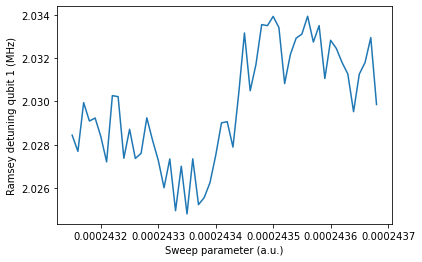

In [134]:
plt.plot(curr_vec_Ramsey_offres_q1, f_vec_Ramsey_offres_q1)
plt.ylabel('Ramsey detuning qubit 1 (MHz)')
plt.xlabel('Sweep parameter (a.u.)')

Now we check the frequency of qubit 3 versus the sweep parameter to verify that q3 crosses q1

In [135]:
with open(os.getcwd() + data_dir + r'/curr_vec_tt_offres_q3.pkl', 'rb') as f:
    curr_vec_tt_offres_q3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/f_vec_tt_offres_q3.pkl', 'rb') as f:
    f_vec_tt_offres_q3 = pickle.load(f)

Text(0.5, 0, 'Sweep parameter (a.u.)')

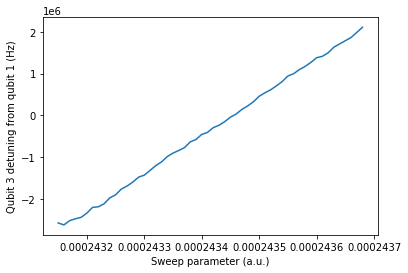

In [136]:
plt.plot(curr_vec_tt_offres_q3, f_vec_tt_offres_q3 - 200e6)
# 200 MHz IF frequency is set to match q1 frequency
plt.ylabel('Qubit 3 detuning from qubit 1 (Hz)')
plt.xlabel('Sweep parameter (a.u.)')

# q1 - q2 avoided crossing while q3 is off-resonant

Move q2 through q1 which is at half-flux

In [137]:
with open(os.getcwd() + data_dir + r'/x__tt_q1_q2.pkl', 'rb') as f:
    x__tt_q1_q2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'/y__tt_q1_q2.pkl', 'rb') as f:
    y__tt_q1_q2 = pickle.load(f)
x__tt_q1_q2 = np.concatenate([x__tt_q1_q2[0], x__tt_q1_q2[1] ])
y__tt_q1_q2 = np.concatenate([y__tt_q1_q2[0], y__tt_q1_q2[1] ])

Text(0.5, 0, 'Sweep parameter (a.u.)')

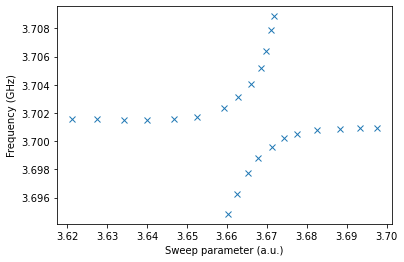

In [138]:
plt.plot(x__tt_q1_q2, y__tt_q1_q2, 'x')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameter (a.u.)')